In [25]:
%%time
# !head -n 20 bluetooth_graph_analysis.py
!awk 'FNR>=28 && FNR<=50' bluetooth_graph_analysis.py
%run bluetooth_graph_analysis.py
%matplotlib inline

from speclib import misc, plotting, loaders, graph  # noqa
PRINT = False


@jit()
def compareDfUsers(baseuser, peers, df):
    # Compute the similarity in the way they answered the questions
    dct = dict()
    for i in range(len(peers)):
        dct[(baseuser, peers[i])] = simfnc(df.loc[baseuser], df.loc[peers[i]])
    sim = pd.Series(dct).sort_values(ascending=False)
    return sim


dfa = pd.read_msgpack('/lscr_paper/allan/allan_data/participants_graph_adjacency.msgpack')
mask = dfa.sum() != 0
dfa = dfa.loc[mask, mask]  # drop zero-columns
dfa.head()
qdf = pd.read_json('/lscr_paper/allan/allan_data/RGender_.json')
q = misc.QuestionCompleter(qdf)
f = misc.QuestionFilterer(qdf)
ua = loaders.Useralias()



/lscr_paper/allan/scripts/morequestions/bluetooth_graph_analysis.py:73: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qdf = qdf[alcohol_questions.notnull().any(axis=1)]


CPU times: user 5.68 s, sys: 452 ms, total: 6.13 s
Wall time: 6.26 s


In [30]:
df_alc = pd.concat(alcohol) 
df_big5 = pd.concat(big5)
df_people = pd.concat(people)

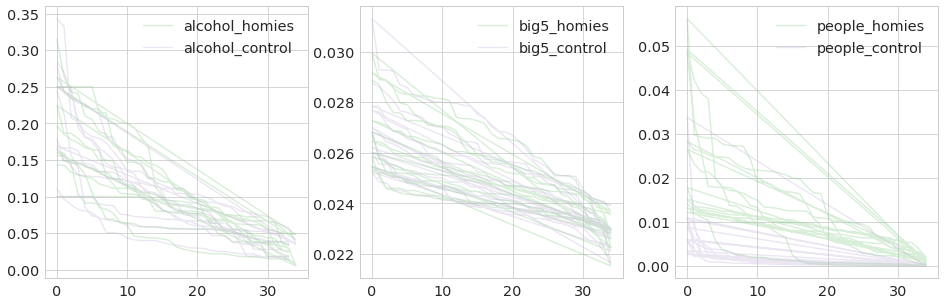

In [36]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 5))
df_alc.plot(ax=ax0, alpha=0.3)
df_big5.plot(ax=ax1, alpha=0.3)
df_people.plot(ax=ax2, alpha=0.3)